In [1]:
import courses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
args = {"prof_fn":"Scott", "prof_ln":"Wakely"}

In [ ]:
bruh, lol, brah = courses.find_courses(args)

In [ ]:
bruh.groupby(['course']).mean()

In [ ]:
bruh.dropna(axis = (1), how = "all", inplace = True)

In [ ]:
columns = list(bruh.columns)

In [ ]:
columns_not_to_graph = ['course_id', 'low_time', 'avg_time', 'high_time', 'fn', 'ln', 'year']
graph_columns = list(set(columns).difference(columns_not_to_graph))

In [ ]:
bruh = bruh[graph_columns]

In [ ]:
brah = bruh.groupby(['course']).mean()

In [ ]:
brah.shape

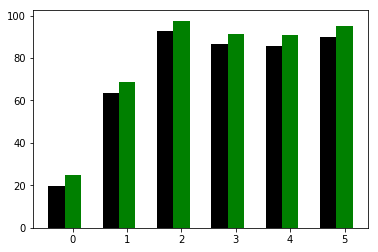

In [26]:
import numpy as np
b1 = np.array([19.75, 63.750, 92.6, 86.475, 85.775, 89.975])
b2 = b1 + 5
n = len(b1)
x = np.arange(n)
plt.bar(x=x-0.3, width=0.3, height=b1, color = 'black')
plt.bar(x=x, width=0.3, height=b2, color='g')
plt.show()

each bar is actually one of the entries in the list  
which means that weirdly enough i need to itercolumns or something?

In [ ]:
len(b1)

In [74]:
def prof_score_graph(args_from_ui):
    prof_df, dept_df, dept = courses.find_courses(args_from_ui)
    small_df, year = get_small_df(prof_df, "prof")
    small_df.dropna(axis = (1), how = "all", inplace = True)
    columns_not_to_graph = ['course_id', 'low_time', 'avg_time', 'high_time', 'fn', 'ln', 'year']
    columns = list(small_df.columns)
    graph_columns = list(set(columns).difference(columns_not_to_graph))
    small_df = small_df[graph_columns]

    #first get the average of scores
    continuous_df = small_df.groupby(['course']).mean()
    compare_to_dept_columns = list(continuous_df.columns)
    dept_df = dept_df[compare_to_dept_columns].mean()
    dept_df.rename(index = dept, inplace = True)
    continuous_df = continuous_df.append(dept_df)
    n = continuous_df.shape[0]
    ind = np.arange(n)
    width = 0.05  
    offset = 0
    plt.figure(figsize = (20, 7))
    bars = []
    for column in continuous_df:
        bar = plt.bar(x = ind - (offset * width), width=width, height=continuous_df[column])
        offset += 1
        bars.append(bar)
    xnames = list(continuous_df.axes[0])
    plt.xticks(ind, xnames, rotation = 20, fontsize = 10, ha = 'right')
    plt.legend(bars, compare_to_dept_columns)
    plt.show()
    
    return plt, bars
    
    
def get_small_df(dataframe, prof_or_course):
    current_year = 2018
    timespan = 5
    if prof_or_course == "prof":
        while dataframe.course.unique().shape[0] > 10:
            timespan -= 1
            dataframe = dataframe[dataframe.year >= current_year - timespan]
        dataframe = dataframe.groupby(['course']).mean()

    if prof_or_course == "course":
        while dataframe.groupby(['fn', 'ln']).mean().shape[0] > 10:
            timespan -= 1
            dataframe = dataframe[dataframe.year >= current_year - timespan]
        dataframe = dataframe.groupby(['fn', 'ln']).mean()


    return dataframe, current_year - timespan

PHYS


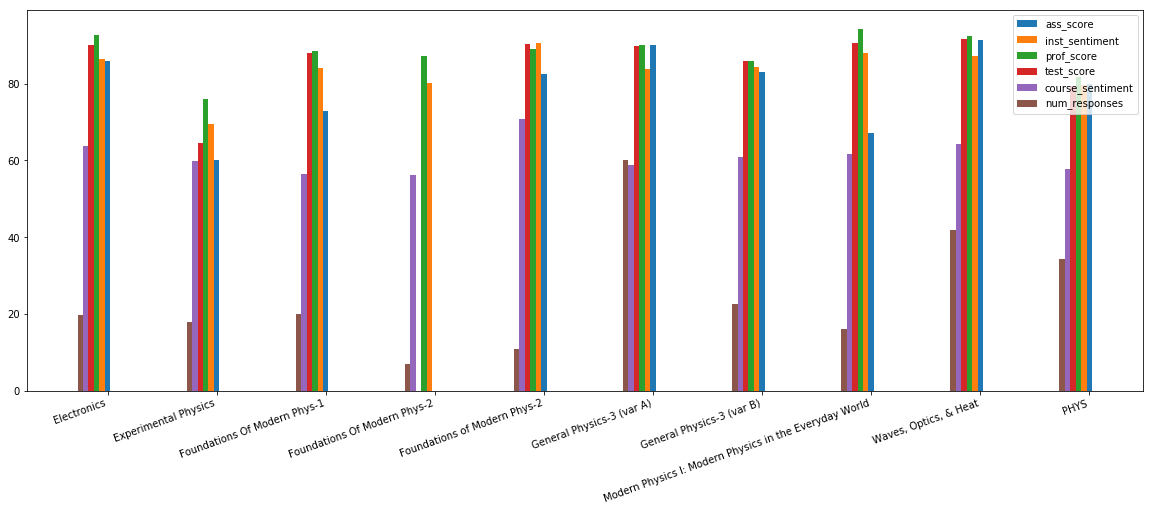

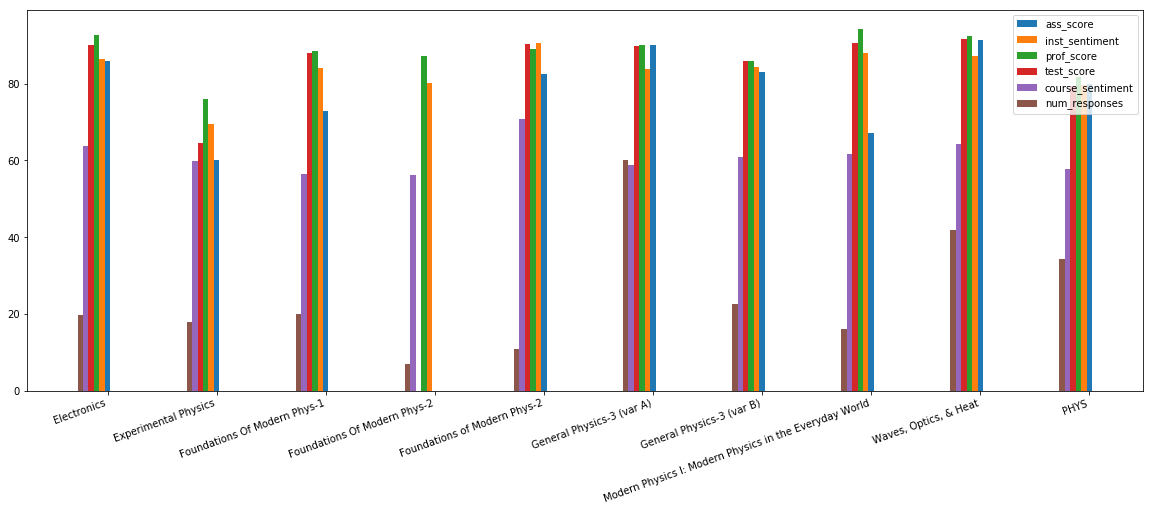

In [75]:
lol, bars = prof_score_graph(args)

In [69]:
for bar in bars[0]:
    bar.legend(["lol"])

AttributeError: 'Rectangle' object has no attribute 'legend'

In [35]:
for column in lol:
    print(lol[column])

course
Electronics                                               85.775000
Experimental Physics                                      60.066667
Foundations Of Modern Phys-1                              73.000000
Foundations Of Modern Phys-2                                    NaN
Foundations of Modern Phys-2                              82.400000
General Physics-3 (var A)                                 90.100000
General Physics-3 (var B)                                 83.100000
Modern Physics I: Modern Physics in the Everyday World    67.100000
Waves, Optics, & Heat                                     91.450000
PHYS                                                      79.974948
Name: ass_score, dtype: float64
course
Electronics                                               86.475000
Experimental Physics                                      69.450000
Foundations Of Modern Phys-1                              84.000000
Foundations Of Modern Phys-2                              80.100000
Fo

In [ ]:
bruh.rename(index = "PHYS", inplace = True)

In [ ]:
lol = lol.append(bruh)

In [ ]:
lol.axes[0]